In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [10]:
# Load the dataset
df = pd.read_csv('/content/SBIN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [11]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [13]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [14]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train.shape

(5659, 4)

In [18]:
X_test.shape

(1415, 4)

In [19]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")

    return rmse, mae, mape


In [20]:

metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": []
}

# **1. Linear Regression**

In [21]:
# Create a linear regression model
model1 = LinearRegression()

In [22]:
y_train.head()

,Close
5286,257.350006
3408,129.464996
5477,279.350006
6906,588.500000
530,21.644367


In [23]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [24]:
rmse, mae, mape = evaluate_model(model1, X_test, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 1.6881364642878485
MAE: 0.9433353484789417
MAPE: 0.006085435991202993



# 2. Support Vector Regression

In [25]:
# Create an SVR model
model2 = SVR()

In [26]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [27]:
rmse, mae, mape = evaluate_model(model2, X_test, y_test)
metrics["Model"].append("SVR")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 147.71103599153602
MAE: 110.99419106508152
MAPE: 1.9715076513294716



# 3. Random Forest Regressor

In [28]:
model3 = RandomForestRegressor()

In [29]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
rmse, mae, mape = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Random Forest")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.93130980701244
MAE: 162.98909493804314
MAPE: 0.7508266646157591



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# 4. Gradient Boosting Models

In [31]:
model4 = GradientBoostingRegressor()

In [32]:
# Train the model
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [33]:
rmse, mae, mape = evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.41069433522418
MAE: 162.2712281619757
MAPE: 0.7378541693598376



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# 5. Extreme Graident Boosting

In [35]:
!pip install xgboost
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [36]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
rmse, mae, mape = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.66436370022384
MAE: 162.62070643817412
MAPE: 0.7441437311249671



# 6. AdaBoost Regressor

In [38]:
model6 = AdaBoostRegressor()

In [39]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [40]:
rmse, mae, mape = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 211.84016190199145
MAE: 150.27932429061372
MAPE: 0.7057669522844586



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


# 7. Decision Tree

In [41]:
model7 = DecisionTreeRegressor()

In [42]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
rmse, mae, mape = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.85857555038172
MAE: 162.88870413804315
MAPE: 0.7490024715971244



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# 8. KNeighbors Regressor

In [44]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [45]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
rmse, mae, mape = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.35603706259303
MAE: 162.1962430618594
MAPE: 0.7365233640314862



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# 9. Artificial Neural Networks

In [47]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [48]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [51]:
rmse, mae, mape = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

45/45 [==============================] - 0s 1ms/step
RMSE: 2.9928054434827525
MAE: 1.963869507604453
MAPE: 0.014526009797749508



# 10. Long Short Term Memory

In [52]:
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])

In [53]:
model10 = Sequential()
model10.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model10.add(Dense(1))

In [54]:
# Compile the model
model10.compile(loss='mean_squared_error', optimizer='adam')


In [55]:
model10.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [56]:
rmse, mae, mape = evaluate_model(model10, X_test_reshaped, y_test[n_steps-1:])

# Store metrics
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

44/44 [==============================] - 0s 3ms/step
RMSE: 15.359295807149854
MAE: 12.278894525379425
MAPE: 0.27883509462425415



# **11. Lasso Regression**

In [69]:
from sklearn.linear_model import Lasso

model11 = Lasso(alpha=0.001)  # Decreased alpha for less regularization
model11.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model11, X_test_scaled, y_test)

metrics["Model"].append("Lasso Regression (Updated)")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 3.5005772524019725
MAE: 2.1759919360445914
MAPE: 0.014216792315179878



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.470e+04, tolerance: 1.349e+04
  model = cd_fast.enet_coordinate_descent(


# **12.Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge

model12 = Ridge(alpha=0.5)
model12.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model12, X_test_scaled, y_test)
metrics["Model"].append("Ridge Regression")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 2.7385522000826734
MAE: 1.6950420985832253
MAPE: 0.010816737779364599



# **13.ElasticNet Regression**

In [61]:
from sklearn.linear_model import ElasticNet

model13 = ElasticNet(alpha=0.05, l1_ratio=0.7)
model13.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model13, X_test_scaled, y_test)
metrics["Model"].append("ElasticNet Regression")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 14.804090936708079
MAE: 11.800446698217334
MAPE: 0.24325036314896364



# **14.SVR with RBF Kernel**

In [62]:
from sklearn.svm import SVR

model14 = SVR(kernel='rbf', C=10, epsilon=0.05)
model14.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model14, X_test_scaled, y_test)
metrics["Model"].append("SVR (RBF)")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 4.1606646051672405
MAE: 1.7711785377611675
MAPE: 0.015270499337866636



# **15.Bayesian Ridge Regression**

In [65]:
from sklearn.linear_model import BayesianRidge

# Replace 'n_iter' with 'max_iter'
model15 = BayesianRidge(max_iter=300, tol=1e-4)
model15.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model15, X_test_scaled, y_test)
metrics["Model"].append("Bayesian Ridge")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 1.6881351101001205
MAE: 0.9434406049061286
MAPE: 0.006085921149239934



# **16.Huber Regressor**

In [66]:
from sklearn.linear_model import HuberRegressor

model16 = HuberRegressor(epsilon=1.5)
model16.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model16, X_test_scaled, y_test)
metrics["Model"].append("Huber Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 1.7227752104860061
MAE: 0.9183987164012762
MAPE: 0.005933218462550846



# **17.Passive Aggressive Regressor**

In [67]:
from sklearn.linear_model import PassiveAggressiveRegressor

model17 = PassiveAggressiveRegressor(max_iter=1500, tol=1e-4)
model17.fit(X_train_scaled, y_train)
rmse, mae, mape = evaluate_model(model17, X_test_scaled, y_test)
metrics["Model"].append("Passive Aggressive Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 2.064959947140465
MAE: 1.3041435991086505
MAPE: 0.011270470851679414



# **18.ARIMA**

In [75]:
!pip install statsmodels
!pip install pmdarima
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima


# Assuming you have your data loaded and preprocessed as before (df, X_train, X_test, y_train, y_test)

# Automatic ARIMA Order Selection using auto_arima
# Find the best (p, d, q) values
best_model = auto_arima(y_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = best_model.order

# Fit the ARIMA model
model18 = ARIMA(y_train, order=(p, d, q))
model18_fit = model18.fit()

# Make predictions
# Use len(y_train) as the starting point for predictions
# Forecast for the length of y_test
predictions = model18_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"ARIMA RMSE: {rmse}")
print(f"ARIMA MAE: {mae}")
print(f"ARIMA MAPE: {mape}\n")

# Store metrics
metrics["Model"].append("ARIMA")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 87.8 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=78005.789, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=75551.578, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76619.836, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=74813.034, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=74364.052, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=74074.892, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=73959.511, Time=0.34 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=2.61 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.82 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=73094.800, Time=0.63 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=73094.769, Time=0.44 sec
 ARIMA(3,0,0)(0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA RMSE: 155.08416914567002
ARIMA MAE: 124.61616145375949
ARIMA MAPE: 2.6139414956995837



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# **RMSE PLOT**

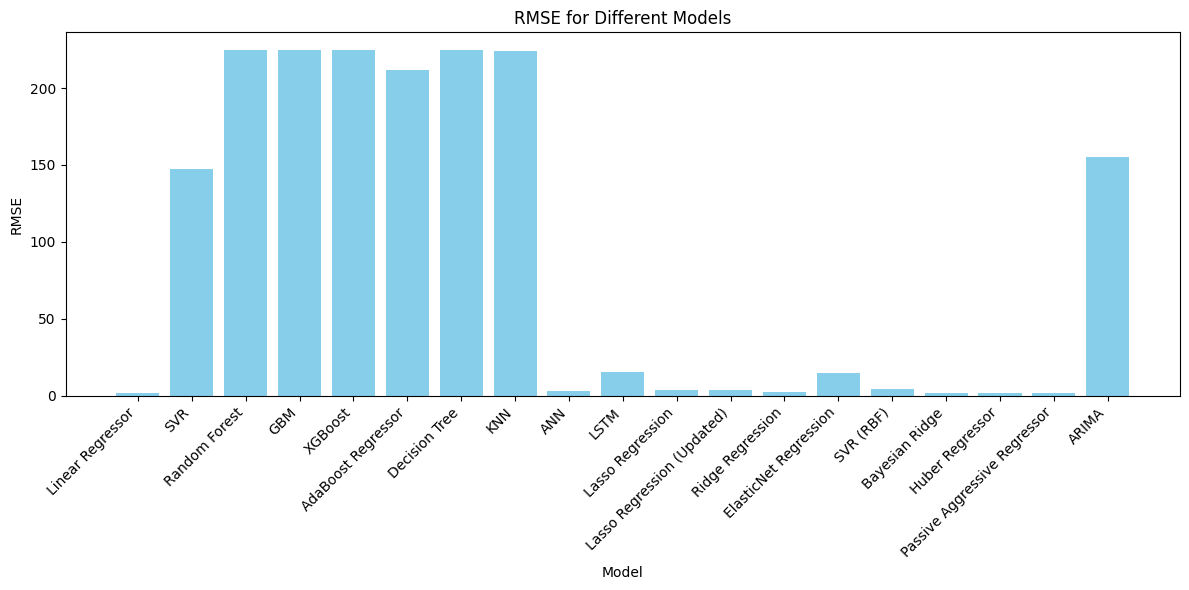

In [76]:
metrics_df = pd.DataFrame(metrics)

# RMSE Plot
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.title('RMSE for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **MAE Plot**

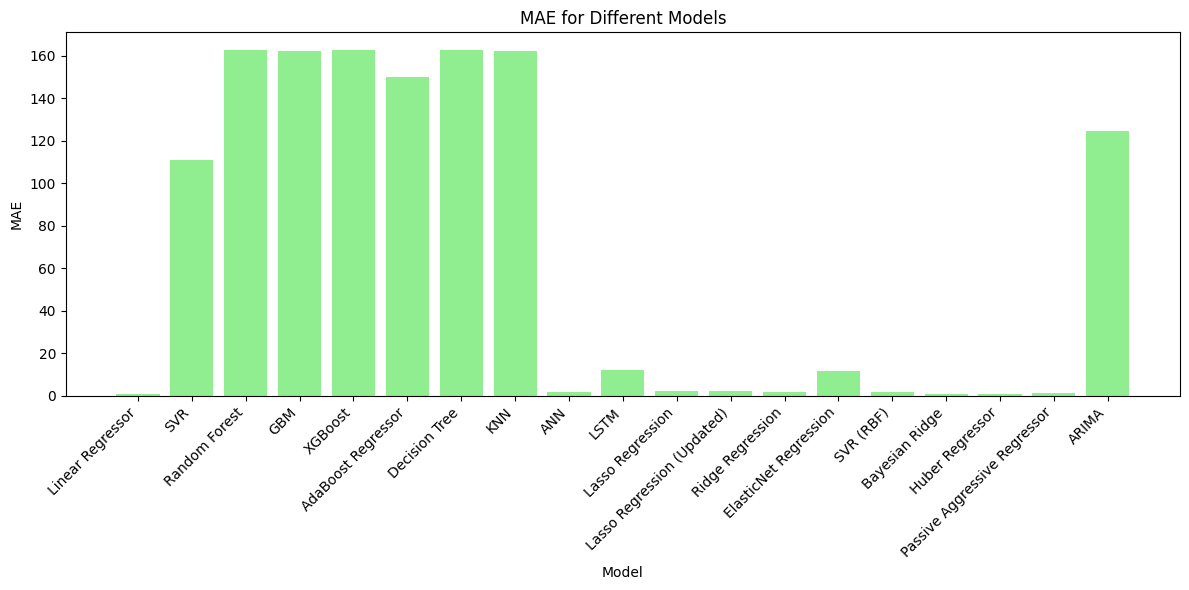

In [77]:
# MAE Plot
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')
plt.title('MAE for Different Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **MAPE Plot**

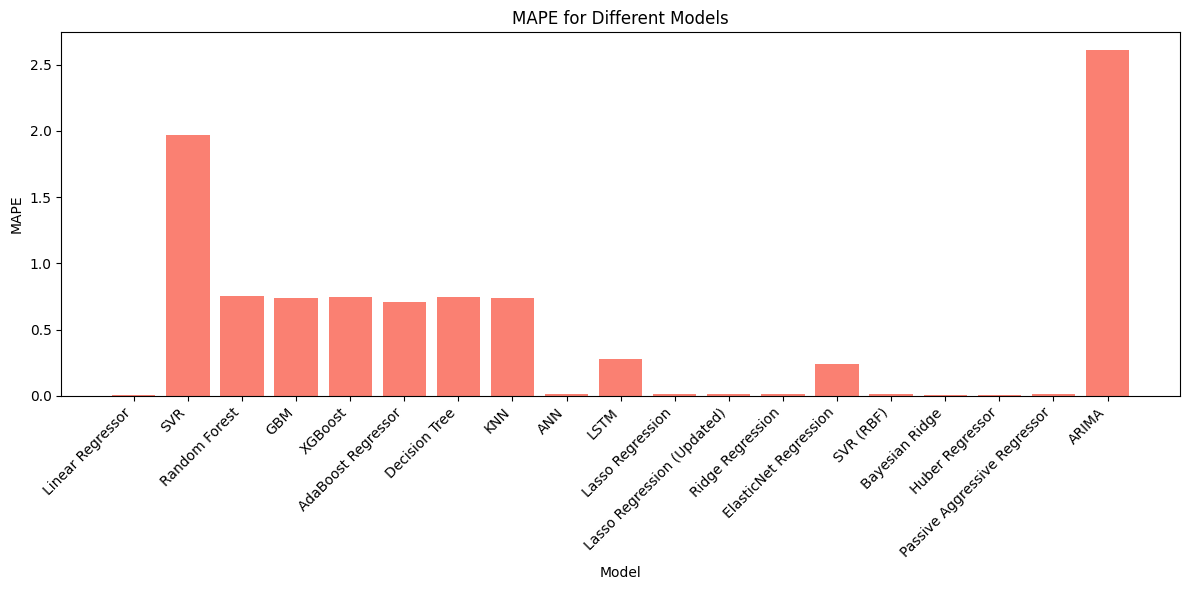

In [78]:
# MAPE Plot
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.title('MAPE for Different Models')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()